Question 7

Load the Titanic dataset and predict whether a passenger survived or not. Preprocess the data (handle missing values, encode categorical variables, etc.). Train a Naive Bayes model on the processed dataset. Evaluate its accuracy and confusion matrix,f1-score,precision,recall and ROC curve. Interpret the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\OneDrive\Desktop\ML_PRAC\ML_PRAC\tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df=df.drop(['Cabin','Name'],axis=1)

In [8]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [9]:
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [10]:
age_range={'<20':0,'<40':0,'<60':0,'>60':0}
for i in df['Age']:
    if i<20:
        age_range['<20']+=1
    elif i<40:
        age_range['<40']+=1
    elif i<60:
        age_range['<60']+=1
    elif i>60:
        age_range['>60']+=1
    else:
        continue

In [11]:
age_range

{'<20': 61, '<40': 189, '<60': 68, '>60': 11}

In [12]:
df['Age'].mean(),df['Age'].median()

(30.272590361445783, 27.0)

In [13]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=3)

In [16]:
df['Age']=knn_imp.fit_transform(df[['Age']])

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df['Sex']=le.fit_transform(df['Sex'])

In [22]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [25]:
from sklearn.model_selection import train_test_split

In [43]:
df1=pd.DataFrame(df.copy())

In [48]:
x=df1.drop(['PassengerId','Survived','Ticket'],axis=1)
y=df['Survived']

In [50]:
x[:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [52]:
y[:3]

0    0
1    1
2    0
Name: Survived, dtype: int64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((334, 7), (334,), (84, 7), (84,))

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
GNB=GaussianNB()

In [76]:
GNB.fit(x_train,y_train)

GaussianNB()

In [77]:
y_pred=GNB.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,RocCurveDisplay

In [83]:
accuracy_score(y_test,y_pred)

1.0

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [88]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

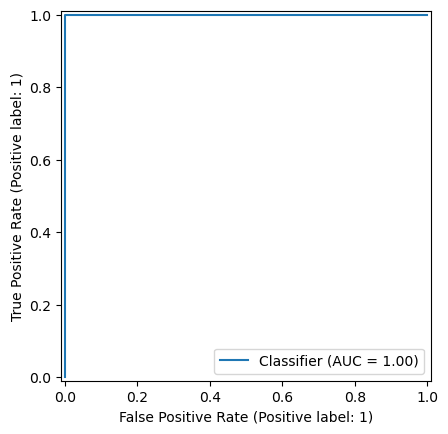

In [90]:
display=RocCurveDisplay.from_predictions(y_test,y_pred)